Regrid each files -> average -> plot

In [1]:
import xesmf as xe
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob as glob
import os
import pandas as pd
from pvlib.solarposition import get_solarposition

In [34]:
# Load the dataset
files = sorted(glob.glob(
    "/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.202308**18*.nc"
))
print(files)


['/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080118.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080218.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080318.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080418.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080518.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080618.5deg.ll.nc', '/ships22

In [35]:
raqms_ds = xr.open_dataset(files[0])
print(raqms_ds)
print(raqms_ds.dims)
print(raqms_ds.coords)


<xarray.Dataset> Size: 8GB
Dimensions:      (time: 1, tile: 6, grid_xt: 720, grid_yt: 361, grid_zt: 64)
Coordinates:
  * time         (time) float64 8B 213.8
  * grid_xt      (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * grid_yt      (grid_yt) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * grid_zt      (grid_zt) float64 512B 1.0 2.0 3.0 4.0 ... 61.0 62.0 63.0 64.0
Dimensions without coordinates: tile
Data variables: (12/175)
    imin         (tile) int32 24B ...
    imax         (tile) int32 24B ...
    jmin         (tile) int32 24B ...
    jmax         (tile) int32 24B ...
    lat          (time, grid_yt, grid_xt) float32 1MB ...
    lon          (time, grid_yt, grid_xt) float32 1MB ...
    ...           ...
    jo1d         (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    jno          (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    cot6hr       (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    emcofire     (time, grid_zt, grid_yt, grid_xt) fl

In [36]:
timestamp_str = os.path.basename(files[0]).split('.')[1]
timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')
print(timestamp)

2023-08-01 18:00:00


In [37]:
raqms_lat = raqms_ds['grid_yt'].values
raqms_lon = raqms_ds['grid_xt'].values
#Create 2D grid for lat/lon ---
lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)  # shape (361, 720)

In [38]:
#one lat/lon per point
flat_lat = lat2d.flatten()
flat_lon = lon2d.flatten()
flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')

In [39]:
solpos = get_solarposition(flat_time, flat_lat, flat_lon)
print(solpos)

                     apparent_zenith      zenith  apparent_elevation  \
2023-08-01 18:00:00       107.944473  107.944473          -17.944473   
2023-08-01 18:00:00       107.944473  107.944473          -17.944473   
2023-08-01 18:00:00       107.944473  107.944473          -17.944473   
2023-08-01 18:00:00       107.944473  107.944473          -17.944473   
2023-08-01 18:00:00       107.944473  107.944473          -17.944473   
...                              ...         ...                 ...   
2023-08-01 18:00:00        72.009144   72.060092           17.990856   
2023-08-01 18:00:00        72.009144   72.060092           17.990856   
2023-08-01 18:00:00        72.009144   72.060092           17.990856   
2023-08-01 18:00:00        72.009144   72.060092           17.990856   
2023-08-01 18:00:00        72.009144   72.060092           17.990856   

                     elevation    azimuth  equation_of_time  
2023-08-01 18:00:00 -17.944473  271.59156         -6.362936  
2023-08-01 

In [40]:
sza_flat = solpos['apparent_zenith'].values
sza = sza_flat.reshape(lat2d.shape)
sza

array([[107.94447253, 107.94447253, 107.94447253, ..., 107.94447253,
        107.94447253, 107.94447253],
       [107.92987987, 107.93424157, 107.93860409, ..., 107.9168031 ,
        107.92116031, 107.92551934],
       [107.91387693, 107.92259931, 107.93132357, ..., 107.88772771,
        107.89644047, 107.90515709],
       ...,
       [ 71.9842669 ,  71.99296645,  72.00166699, ...,  71.95818084,
         71.96687343,  71.97556901],
       [ 71.99600084,  72.00035053,  72.00470083, ...,  71.98295874,
         71.98730461,  71.99165209],
       [ 72.00914372,  72.00914372,  72.00914372, ...,  72.00914372,
         72.00914372,  72.00914372]])

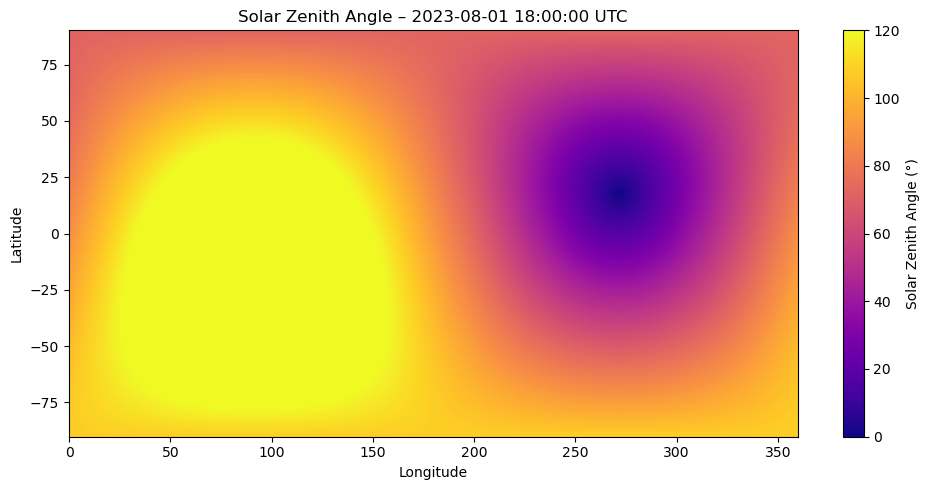

In [41]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, sza, shading='auto', cmap='plasma', vmin=0, vmax=120)
plt.colorbar(label='Solar Zenith Angle (°)')
plt.title(f'Solar Zenith Angle – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

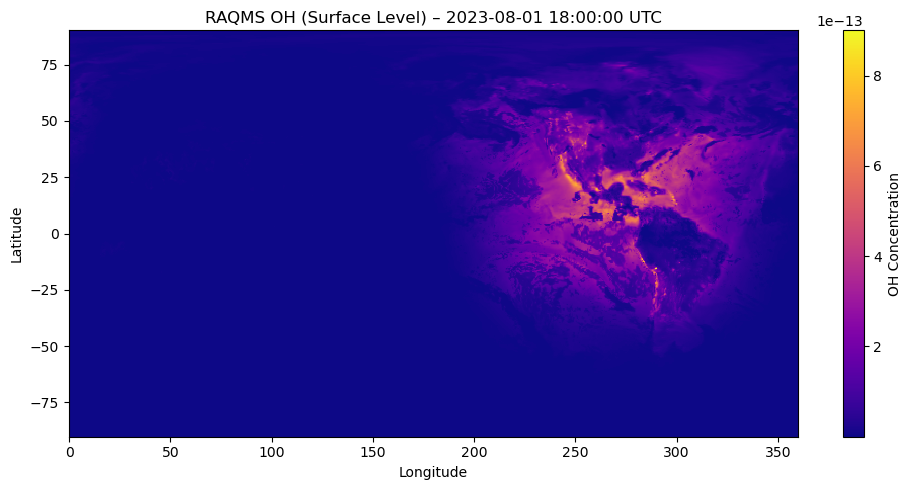

In [42]:
# OH data at surface level
oh = raqms_ds['oh'].isel(time=0, grid_zt=0).values  

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, oh, shading='auto', cmap='plasma') 
plt.colorbar(label='OH Concentration')  
plt.title(f'RAQMS OH (Surface Level) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


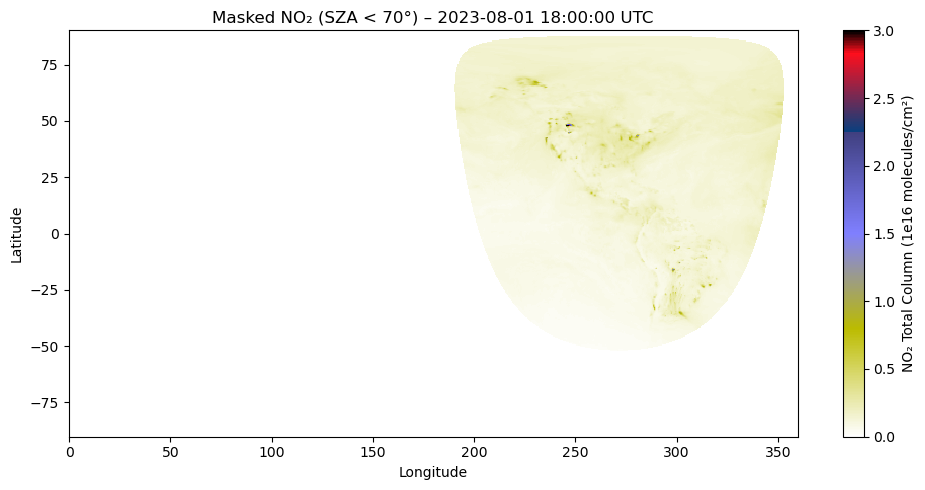

In [43]:
#mask where SZA is >= 70 degrees (keep no2 data where SZA < 70)

no2 = raqms_ds['no2tot'].isel(time=0) * 100  # Convert from 1e18 to 1e16 molecules/cm²
no2_masked = np.where(sza >= 70, np.nan, no2)

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, no2_masked, shading='auto', cmap='gist_stern_r', vmin=0, vmax=3)
plt.colorbar(label='NO₂ Total Column (1e16 molecules/cm²)')
plt.title(f'Masked NO₂ (SZA < 70°) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



In [44]:
raqms_lat.shape, raqms_lon.shape

((361,), (720,))

In [45]:
tempo_file = '/ships22/raqms/Satellite/TEMPO/V03/L3/NO2/2023/TEMPO_NO2_L3_V03_20230831T182455Z_S011.nc'
tempo_ds = xr.open_dataset(tempo_file)

tempo_lat = tempo_ds['latitude']
tempo_lon = tempo_ds['longitude']
tempo_ds

<xarray.Dataset> Size: 91MB
Dimensions:    (longitude: 7750, latitude: 2950, time: 1)
Coordinates:
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * time       (time) datetime64[ns] 8B 2023-08-31T18:25:13.140176896
Data variables:
    weight     (latitude, longitude) float32 91MB ...
Attributes: (12/40)
    history:                          2024-06-16T05:09:28Z: L2_regrid -v /tem...
    scan_num:                         11
    time_coverage_start:              2023-08-31T18:24:55Z
    time_coverage_end:                2023-08-31T19:27:05Z
    time_coverage_start_since_epoch:  1377541513.140177
    time_coverage_end_since_epoch:    1377545243.3725407
    ...                               ...
    title:                            TEMPO Level 3 nitrogen dioxide product
    collection_shortname:             TEMPO_NO2_L3
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
    summary:                          Nitrogen dioxide Level 3 files provide ...
    coremetadata:                     \nGROUP                  = INVENTORYMET...

In [46]:
source_grid = {'lat': raqms_lat, 'lon': raqms_lon}
target_grid = {'lat': tempo_lat, 'lon': tempo_lon}

In [47]:
regridder = xe.Regridder(source_grid, target_grid, method='bilinear', periodic=True)


In [48]:
#for all files

output_dir = "18Z_RAQMS_Regridded_TEMPO_nc"
os.makedirs(output_dir, exist_ok=True)

for file_path in files:
    ds = xr.open_dataset(file_path)
    timestamp_str = os.path.basename(file_path).split('.')[1]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')

# Extract lat/lon and build 2D grid
    raqms_lat = ds['grid_yt'].values
    raqms_lon = ds['grid_xt'].values
    lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)

# Flatten for SZA calculation
    flat_lat = lat2d.flatten()
    flat_lon = lon2d.flatten()
    flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')
# SZA calculation  
    solpos = get_solarposition(flat_time, flat_lat, flat_lon)
    sza_flat = solpos['apparent_zenith'].values
    sza = sza_flat.reshape(lat2d.shape)

# Mask NO₂
    no2 = ds['no2tot'].isel(time=0).values * 100 # Convert from 1e18 to 1e16 molecules/cm
    no2_masked = np.where(sza >= 70, np.nan, no2)

    # Wrap as DataArray
    no2_da = xr.DataArray(
        no2_masked,
        dims=['lat', 'lon'],
        coords={'lat': raqms_lat, 'lon': raqms_lon}
    )

# Regrid
    no2_regridded = regridder(no2_da)

# Save regridded nc files
    base = os.path.basename(file_path)
    out_path = os.path.join(output_dir, base)
    out_ds = xr.Dataset({'no2tot': no2_regridded})
    out_ds.to_netcdf(out_path)
    print(f"Saved regridded file: {out_path}")



/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023082918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023083018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: 18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023083118.5deg.ll.nc


In [49]:
n_files = sorted(glob.glob("/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.202308*.nc"))
print(n_files)

['/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080318.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080418.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080518.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080618.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080718.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080818.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080918.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081018.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081118.5deg.ll.nc', '/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023081218.5deg.ll.nc', '/home/alubianashari/18Z_RA

In [50]:
#grouping files by day
daily_files = {}
for f in n_files:
    filename = os.path.basename(f)
    timestamp = filename.split('.')[1]
    date_str = timestamp[:8]

    if date_str not in daily_files:
        daily_files[date_str] = [f]
    else:
        daily_files[date_str].append(f)
print(daily_files.keys())

dict_keys(['20230801', '20230802', '20230803', '20230804', '20230805', '20230806', '20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814', '20230815', '20230816', '20230817', '20230818', '20230819', '20230820', '20230821', '20230822', '20230823', '20230824', '20230825', '20230826', '20230827', '20230828', '20230829', '20230830', '20230831'])


In [51]:
day_files = daily_files['20230802']
print(day_files)

['/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc']


In [53]:
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# --- Helper Functions ---
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=1)
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
    return ax

def plot_ticks(ax, lon_min, lon_max, lat_min, lat_max):
    ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    return ax

# make directory for figures
os.makedirs("18Z_Regridded_RAQMS_TEMPO_Figures", exist_ok=True)

# Daily files dictionary
raqms_files = sorted(glob.glob("/home/alubianashari/18Z_RAQMS_Regridded_TEMPO_nc/*.nc"))
daily_files = {}
for f in raqms_files:
    date_str = os.path.basename(f).split('.')[1][:8]
    daily_files[date_str] = f  

# Loop through the dates and plot the NO2 data
dates = [
    '20230801', '20230802', '20230803', '20230804', '20230805',
    '20230806', '20230807', '20230808', '20230809', '20230810',
    '20230811', '20230812', '20230813', '20230814', '20230815',
    '20230816', '20230817', '20230818', '20230819', '20230820',
    '20230821', '20230822', '20230824', '20230825',
    '20230826', '20230828', '20230829', '20230830',
    '20230831'
]

# Plotting
for date in dates:
    print(f"Plotting {date}")
    file_path = daily_files[date]

    ds = xr.open_dataset(file_path)
    lat = ds['latitude']
    lon = ds['longitude']
    no2_18z = ds['no2tot']

    # Plotting
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())

    lon_min, lon_max = float(lon.min()), float(lon.max())
    lat_min, lat_max = float(lat.min()), float(lat.max())
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    plot_background(ax)
    plot_ticks(ax, lon_min, lon_max, lat_min, lat_max)

    mesh = ax.pcolormesh(lon, lat, no2_18z, cmap="gist_stern_r", vmin=0, vmax=3, transform=ccrs.PlateCarree())
    plt.colorbar(mesh, orientation='horizontal', label='NO₂ (10¹⁶ molecules/cm²)', fraction=0.046, pad=0.1)

    ax.set_title(f'RAQMS NO₂ Total Column – 18Z {date}')
    plt.savefig(f"18Z_Regridded_RAQMS_TEMPO_Figures/{date}.png", facecolor='white', bbox_inches='tight')
    plt.close()

Plotting 20230801
Plotting 20230802
Plotting 20230803
Plotting 20230804
Plotting 20230805
Plotting 20230806
Plotting 20230807
Plotting 20230808
Plotting 20230809
Plotting 20230810
Plotting 20230811
Plotting 20230812
Plotting 20230813
Plotting 20230814
Plotting 20230815
Plotting 20230816
Plotting 20230817
Plotting 20230818
Plotting 20230819
Plotting 20230820
Plotting 20230821
Plotting 20230822
Plotting 20230824
Plotting 20230825
Plotting 20230826
Plotting 20230828
Plotting 20230829
Plotting 20230830
Plotting 20230831
